## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# load the data
df = pd.read_csv('PT_INR_Prothrombin _Introduction _Test _Result_Dataset .csv')
df

,Patient ID,Age,Gender,PT Value,INR Value,Health Condition,Treatment Type,Risk Level
0,1,69,Male,18.355144,2.765927,Normal,Vitamin K,Low
1,2,32,Male,10.894440,2.480643,Normal,Anticoagulants,Low
2,3,89,Male,15.985299,2.662863,Normal,Vitamin K,Low
3,4,78,Male,18.171537,2.927404,Normal,Anticoagulants,Low
4,5,38,Female,13.652989,3.195382,Bleeding Disorder,Vitamin K,High
...,...,...,...,...,...,...,...,...
6995,6996,69,Female,16.801529,2.319676,Normal,NaN,Low
6996,6997,23,Male,23.064043,2.153335,Normal,NaN,Low
6997,6998,86,Female,16.917810,2.861205,Normal,Anticoagulants,Low
6998,6999,91,Male,16.872807,2.359891,Normal,Anticoagulants,Low


In [18]:
# Perform one-hot encoding with drop_first=True
df= pd.get_dummies(df, drop_first=True)

In [20]:
# Convert specific columns from True/False to 0/1
columns = ['Gender_Male', 'Risk Level_Low', 'Risk Level_Moderate']
df[columns] = df[columns].astype(int)

In [25]:
df

,Age,PT Value,INR Value,Gender_Male,Health Condition_Clotting Disorder,Health Condition_Normal,Treatment Type_Vitamin K,Risk Level_Low,Risk Level_Moderate
0,0.458199,1.135538,0.510849,1,False,True,True,1,0
1,-1.115617,-1.435172,-0.058068,1,False,True,False,1,0
2,1.308911,0.318968,0.305317,1,False,True,True,1,0
3,0.841020,1.072273,0.832867,1,False,True,False,1,0
4,-0.860404,-0.484668,1.367271,0,False,False,True,0,0
...,...,...,...,...,...,...,...,...,...
6995,0.458199,0.600214,-0.379068,0,False,True,False,1,0
6996,-1.498438,2.758067,-0.710787,1,False,True,False,1,0
6997,1.181305,0.640281,0.700852,0,False,True,False,1,0
6998,1.393983,0.624774,-0.298871,1,False,True,False,1,0


## Preprocess the data

In [21]:
# check whether this data contains null / categorical value
df.isnull().sum()

Age                                   0
PT Value                              0
INR Value                             0
Gender_Male                           0
Health Condition_Clotting Disorder    0
Health Condition_Normal               0
Treatment Type_Vitamin K              0
Risk Level_Low                        0
Risk Level_Moderate                   0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 7000 non-null   float64
 1   PT Value                            7000 non-null   float64
 2   INR Value                           7000 non-null   float64
 3   Gender_Male                         7000 non-null   int64  
 4   Health Condition_Clotting Disorder  7000 non-null   bool   
 5   Health Condition_Normal             7000 non-null   bool   
 6   Treatment Type_Vitamin K            7000 non-null   bool   
 7   Risk Level_Low                      7000 non-null   int64  
 8   Risk Level_Moderate                 7000 non-null   int64  
dtypes: bool(3), float64(3), int64(3)
memory usage: 348.8 KB


In [30]:
df['PT Value'].value_counts()

PT Value
-1.743366    359
 1.135538      1
-1.435172      1
 0.318968      1
 1.072273      1
            ... 
 0.600214      1
 2.758067      1
 0.640281      1
 0.624774      1
 1.162931      1
Name: count, Length: 6642, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

# Ensure 'df' is defined and contains the data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
# Scale numerical variables
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [33]:
df

,Age,PT Value,INR Value,Gender_Male,Health Condition_Clotting Disorder,Health Condition_Normal,Treatment Type_Vitamin K,Risk Level_Low,Risk Level_Moderate
0,0.458199,1.135538,0.510849,0.985252,False,True,True,1.211361,-0.402036
1,-1.115617,-1.435172,-0.058068,0.985252,False,True,False,1.211361,-0.402036
2,1.308911,0.318968,0.305317,0.985252,False,True,True,1.211361,-0.402036
3,0.841020,1.072273,0.832867,0.985252,False,True,False,1.211361,-0.402036
4,-0.860404,-0.484668,1.367271,-1.014969,False,False,True,-0.825518,-0.402036
...,...,...,...,...,...,...,...,...,...
6995,0.458199,0.600214,-0.379068,-1.014969,False,True,False,1.211361,-0.402036
6996,-1.498438,2.758067,-0.710787,0.985252,False,True,False,1.211361,-0.402036
6997,1.181305,0.640281,0.700852,-1.014969,False,True,False,1.211361,-0.402036
6998,1.393983,0.624774,-0.298871,0.985252,False,True,False,1.211361,-0.402036


In [34]:
# Convert specific columns from True/False to 0/1
columns = ['Health Condition_Clotting Disorder', 'Health Condition_Normal', 'Treatment Type_Vitamin K']
df[columns] = df[columns].astype(int)

In [36]:
df

,Age,PT Value,INR Value,Gender_Male,Health Condition_Clotting Disorder,Health Condition_Normal,Treatment Type_Vitamin K,Risk Level_Low,Risk Level_Moderate
0,0.458199,1.135538,0.510849,0.985252,0,1,1,1.211361,-0.402036
1,-1.115617,-1.435172,-0.058068,0.985252,0,1,0,1.211361,-0.402036
2,1.308911,0.318968,0.305317,0.985252,0,1,1,1.211361,-0.402036
3,0.841020,1.072273,0.832867,0.985252,0,1,0,1.211361,-0.402036
4,-0.860404,-0.484668,1.367271,-1.014969,0,0,1,-0.825518,-0.402036
...,...,...,...,...,...,...,...,...,...
6995,0.458199,0.600214,-0.379068,-1.014969,0,1,0,1.211361,-0.402036
6996,-1.498438,2.758067,-0.710787,0.985252,0,1,0,1.211361,-0.402036
6997,1.181305,0.640281,0.700852,-1.014969,0,1,0,1.211361,-0.402036
6998,1.393983,0.624774,-0.298871,0.985252,0,1,0,1.211361,-0.402036


In [37]:
df.info()
#Now its showing Only int nd float values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 7000 non-null   float64
 1   PT Value                            7000 non-null   float64
 2   INR Value                           7000 non-null   float64
 3   Gender_Male                         7000 non-null   float64
 4   Health Condition_Clotting Disorder  7000 non-null   int64  
 5   Health Condition_Normal             7000 non-null   int64  
 6   Treatment Type_Vitamin K            7000 non-null   int64  
 7   Risk Level_Low                      7000 non-null   float64
 8   Risk Level_Moderate                 7000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 492.3 KB


In [38]:
df.describe()
# provides a summary of statistical measures for the numerical columns in the dataset to check outliers

,Age,PT Value,INR Value,Gender_Male,Health Condition_Clotting Disorder,Health Condition_Normal,Treatment Type_Vitamin K,Risk Level_Low,Risk Level_Moderate
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7.000000e+03,7.000000e+03
mean,-2.842171e-17,-1.116567e-17,-1.091191e-17,-2.233134e-17,0.194714,0.602857,0.199429,-3.755726e-17,-4.263256e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.396009,0.489341,0.399599,1.000071e+00,1.000071e+00
min,-1.711116e+00,-1.743366e+00,-3.409619e+00,-1.014969e+00,0.000000,0.000000,0.000000,-8.255178e-01,-4.020360e-01
25%,-8.604039e-01,-7.325291e-01,-6.831836e-01,-1.014969e+00,0.000000,0.000000,0.000000,-8.255178e-01,-4.020360e-01
50%,-9.692039e-03,-1.521910e-02,-3.302240e-03,9.852516e-01,0.000000,1.000000,0.000000,-8.255178e-01,-4.020360e-01
75%,8.410198e-01,6.872136e-01,6.842381e-01,9.852516e-01,0.000000,1.000000,0.000000,1.211361e+00,-4.020360e-01
max,1.734267e+00,3.642967e+00,3.776228e+00,9.852516e-01,1.000000,1.000000,1.000000,1.211361e+00,2.487340e+00


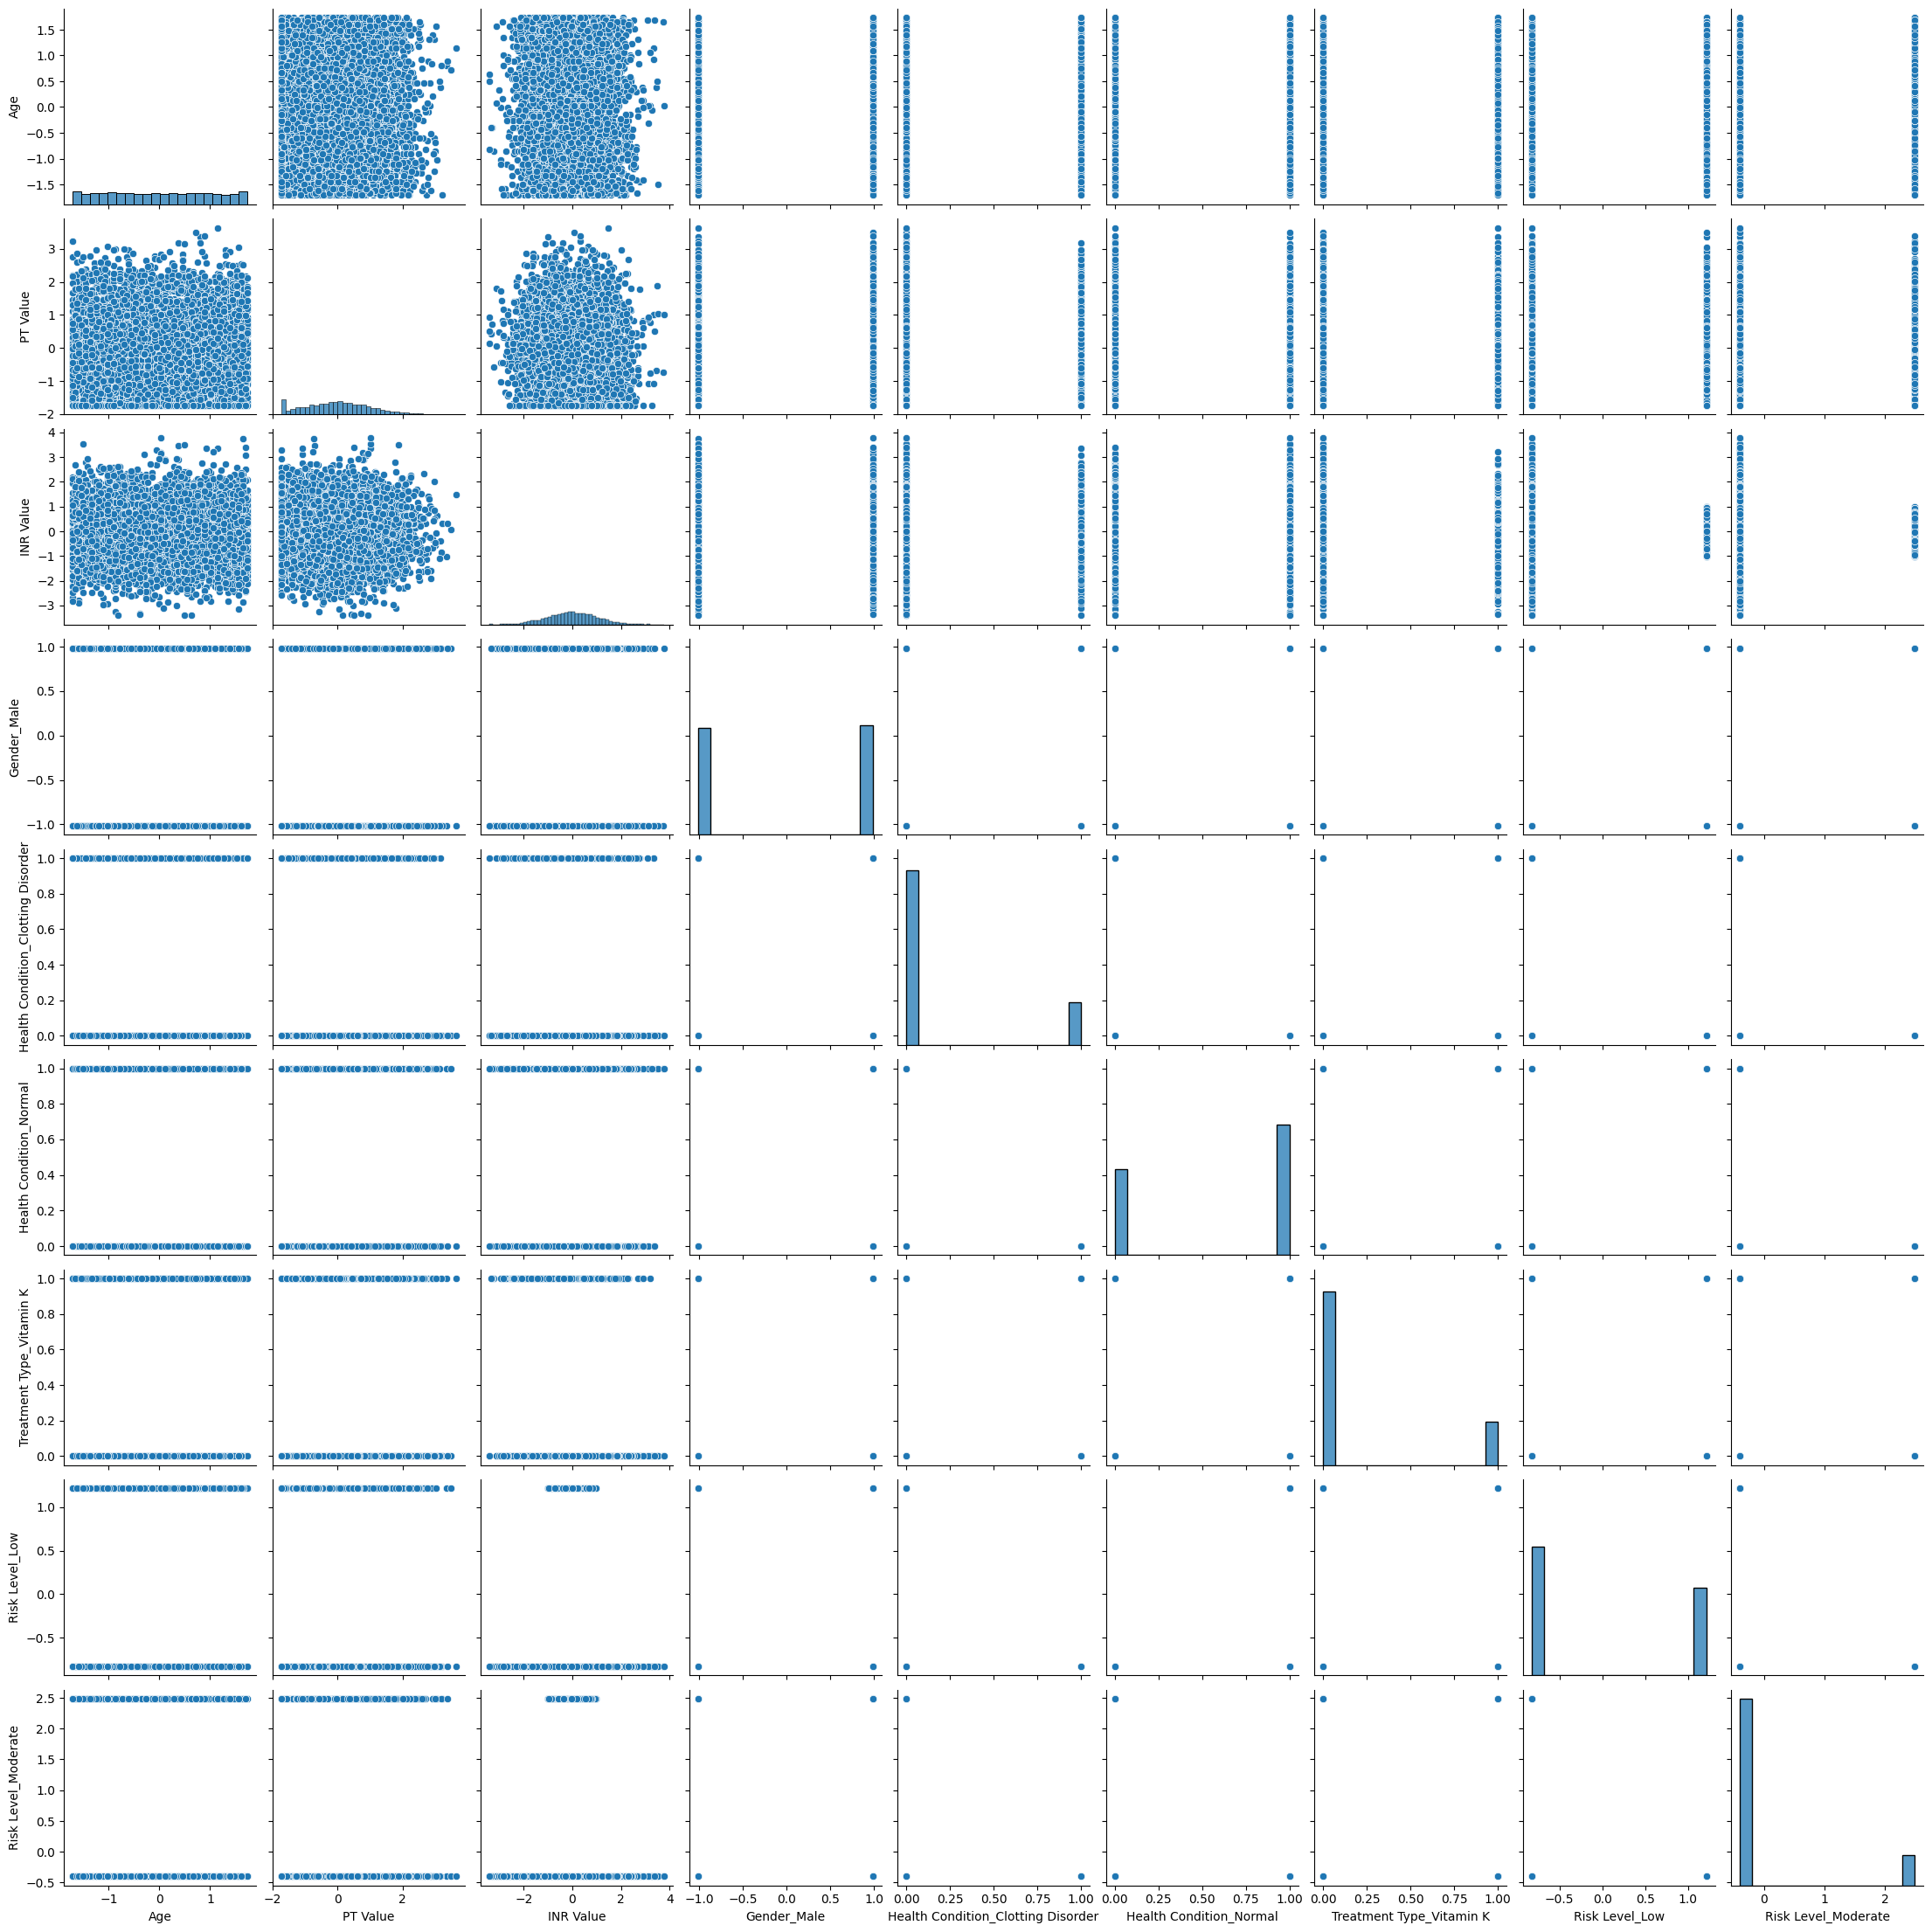

In [39]:
import seaborn as sns
sns.pairplot(df)

## Standarization Process

In [40]:
df.columns

Index(['Age', 'PT Value', 'INR Value', 'Gender_Male',
       'Health Condition_Clotting Disorder', 'Health Condition_Normal',
       'Treatment Type_Vitamin K', 'Risk Level_Low', 'Risk Level_Moderate'],
      dtype='object')

In [41]:
df.shape

(7000, 9)

## Saving the Preprocessed dataset into New dataset in csv format

In [42]:
df.to_csv('Preprocess_PT_INR_Prothrombin.csv',index = False)

In [43]:
df1 = pd.read_csv('Preprocess_PT_INR_Prothrombin.csv')
df1

,Age,PT Value,INR Value,Gender_Male,Health Condition_Clotting Disorder,Health Condition_Normal,Treatment Type_Vitamin K,Risk Level_Low,Risk Level_Moderate
0,0.458199,1.135538,0.510849,0.985252,0,1,1,1.211361,-0.402036
1,-1.115617,-1.435172,-0.058068,0.985252,0,1,0,1.211361,-0.402036
2,1.308911,0.318968,0.305317,0.985252,0,1,1,1.211361,-0.402036
3,0.841020,1.072273,0.832867,0.985252,0,1,0,1.211361,-0.402036
4,-0.860404,-0.484668,1.367271,-1.014969,0,0,1,-0.825518,-0.402036
...,...,...,...,...,...,...,...,...,...
6995,0.458199,0.600214,-0.379068,-1.014969,0,1,0,1.211361,-0.402036
6996,-1.498438,2.758067,-0.710787,0.985252,0,1,0,1.211361,-0.402036
6997,1.181305,0.640281,0.700852,-1.014969,0,1,0,1.211361,-0.402036
6998,1.393983,0.624774,-0.298871,0.985252,0,1,0,1.211361,-0.402036
